[PMID: 31209404](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6726437/)

[SDY997](https://www.immport.org/shared/study/SDY997)

[Single Cell Protal: amp-phase-1 (t_SNE coordinates )](https://portals.broadinstitute.org/single_cell/study/amp-phase-1)

和RA那个数据集是一伙的

analyze kidney biopsies from **24 patients with LN** and **10 control samples**

2,736 leukocytes and 145 epithelial cells  这么少？？？

```shell
gzip -dc exprMatrixSleBroad.tsv.gz | head -n 10 | awk '{print $1,$2,$3}'

# gene K003_L1Q1_A03 K003_L1Q1_A05
# A1BG 0 0
# A1BG-AS1 0 0
# A1CF 2.64864345966836 0
```
`exprMatrixSleBroad.tsv.gz`不是count,唉。。。


In [1]:
import sys
from pathlib import Path
p_temp = str(Path("~/link/res_publish/").expanduser())
None if p_temp in sys.path else sys.path.append(p_temp)
del p_temp

In [2]:
from func import *
import utils as ut
from utils.general import *

sc = ut.sc.sc
pl = ut.pl

2024-09-06 18:14:55.120282: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


[func help]----------------------------------------------------------------
> parameter
    p_root	[name] res_publish
        p_run, p_plot, p_res, p_cache, p_pdf
    p_df_varmap
    map_sp_reverse
    rng
[from func import * ]------------------------------------------------------
| p_root                  | display              | get_res_obs               |
| p_run                   | h5ad_to_mtx          | get_source_obs            |
| p_plot                  | load_adata           | get_matrix_max_prob_median|
| p_res                   | load_normalized_adata| get_matrix_count          |
| p_cache                 | pdf2_merge           | get_path_varmap           |
| p_pdf                   | show_umap            | get_res_stat              |
| p_data_process          | time_tag_detect      | find_path_from_para       |
| map_sp                  | time_tag_get         | func_help                 |
| map_sp_reverse          | time_tag_toggle      |                           |
| map_s

# meta

In [3]:
p_sc = p_data_process.joinpath('SLE_SDY997','SDY997/ResultFile/RNA_sequencing_result')
print(*[_.name for _ in p_sc.iterdir()],sep='\n')
df_meta = pd.read_csv(p_sc.joinpath('SDY997_EXP15176_celseq_meta_unfiltered.tsv.725703.gz'),
            sep='\t')
df_meta = df_meta[df_meta['cell_name'].notna()]
assert df_meta['cell_name'].is_unique,'[Error] is not unique'
df_meta.index = df_meta['cell_name'].to_numpy()
display(df_meta.head(2),df_meta.shape)

SDY997_EXP15176_celseq_matrix_ru1_molecules.tsv.725705.gz
SDY997_EXP15176_celseq_matrix_ru1_reads.tsv.725701.gz
SDY997_EXP15176_celseq_meta_unfiltered.tsv.725703.gz
SDY997_EXP15176_celseq_flow.tsv.725702.gz
SDY997_EXP15176_celseq_matrix_ru10_reads.tsv.725706.gz
SDY997_EXP15176_celseq_bad_barcodes.tsv.725700.gz
SDY997_EXP15176_celseq_flow_markers.tsv.725698.gz
SDY997_EXP15176_celseq_star_log.tsv.725697.gz
SDY997_EXP15176_celseq_matrix_ru10_molecules.tsv.725699.gz
SDY997_EXP15176_ReadMe_expression_2017-05-12.725707.docx
cluster_per_cell.736296.txt
.ipynb_checkpoints


cell_name barcode    sample        type  disease plate  \
K003_L1Q1_A01  K003_L1Q1_A01  AGACTC  200-0608  Epithelial  Control  K003   
K003_L1Q1_A03  K003_L1Q1_A03  ACTCGA  200-0608  Epithelial  Control  K003   

               lane  quadrant well384  picard_pf_bases  ...  molecules_ru1  \
K003_L1Q1_A01   1.0       1.0     A01        3821123.0  ...         2606.0   
K003_L1Q1_A03   1.0       1.0     A03        3224017.0  ...         1986.0   

               genes_detected_ru1  genes_detected_reads_ru1  \
K003_L1Q1_A01               739.0                     739.0   
K003_L1Q1_A03               585.0                     585.0   

               percent_mt_molecules_ru1  percent_mt_reads_ru1    reads  \
K003_L1Q1_A01                  0.407905              0.626177  57754.0   
K003_L1Q1_A03                  0.422457              0.582440  32001.0   

               molecules  genes_detected  percent_mt_molecules  percent_top10  
K003_L1Q1_A01     1228.0           370.0              0.492671       0.530130  
K003_L1Q1_A03      913.0           288.0              0.503834       0.550931  

[2 rows x 34 columns]

(7912, 34)

In [4]:
df_subcluster = pd.read_csv('meta',sep='\t',header=0,skiprows=[1])
df_subcluster['dataset'] = ''
df_subcluster['dataset'] = df_subcluster['dataset'].mask(df_subcluster['Cluster'].str.match('SC-'),'RA')
df_subcluster['dataset'] = df_subcluster['dataset'].mask(df_subcluster['NAME'].str.match('^K'),'SLE-Broad')
df_subcluster['dataset'] = df_subcluster['dataset'].mask(df_subcluster['NAME'].str.match('^COL'),'SLE-Metro')
assert df_subcluster['NAME'].is_unique,'[Error] is not unique'
df_subcluster.index = df_subcluster['NAME'].to_numpy()
# display(df_subcluster.head(2),df_subcluster['dataset'].value_counts())
# df_meta = df_meta.join(df_subcluster.loc[:,['Cluster']])
display(df_subcluster.head(2),df_subcluster.shape,df_subcluster['dataset'].value_counts())
# df_subcluster = df_subcluster.query("dataset == 'SLE-Broad'")
display(df_subcluster.head(2),df_subcluster.shape,df_subcluster['dataset'].value_counts())

NAME Cluster dataset
S006_L1Q1_A03  S006_L1Q1_A03   SC-T1      RA
S006_L1Q1_A05  S006_L1Q1_A05   SC-T4      RA

(12122, 3)

dataset
RA           5265
SLE-Metro    4019
SLE-Broad    2838
Name: count, dtype: int64

NAME Cluster dataset
S006_L1Q1_A03  S006_L1Q1_A03   SC-T1      RA
S006_L1Q1_A05  S006_L1Q1_A05   SC-T4      RA

(12122, 3)

dataset
RA           5265
SLE-Metro    4019
SLE-Broad    2838
Name: count, dtype: int64

In [5]:
df_umap = pd.read_csv('cluster.coords.ampsle.broad.txt',
                      sep='\t',header=0,skiprows=[1])
display(df_umap.head(2),df_umap.shape)
assert df_umap['NAME'].is_unique,'[Error] is not unique'
df_umap.index = df_umap['NAME'].to_numpy()
display(df_umap.head(2),df_umap.shape)

# df_meta 的 index 和 df_subcluster,df_umap 不太一致
# 得把df_subcluster,df_umap 的index 修一修
display(np.intersect1d(df_meta.index,df_subcluster.index).size,
np.intersect1d(df_meta.index,df_subcluster.index).size,
np.intersect1d(df_umap.index,df_subcluster.index).size)
df_umap.index.isin(df_subcluster.index).all()

NAME          X          Y
0  K003_L1Q1_A03 -27.460374 -24.734249
1  K003_L1Q1_A05 -27.412481 -24.774277

(2838, 3)

NAME          X          Y
K003_L1Q1_A03  K003_L1Q1_A03 -27.460374 -24.734249
K003_L1Q1_A05  K003_L1Q1_A05 -27.412481 -24.774277

(2838, 3)

689

689

2838

True

In [6]:
df_umap = df_umap.join(df_subcluster.loc[:,['Cluster']])
del df_subcluster
display(df_umap.head(2),df_umap.shape)

NAME          X          Y Cluster
K003_L1Q1_A03  K003_L1Q1_A03 -27.460374 -24.734249     CE0
K003_L1Q1_A05  K003_L1Q1_A05 -27.412481 -24.774277     CE0

(2838, 4)

In [7]:
display(df_meta.index.isin(['K003_L1Q1_A03']).any(),
df_umap.index.isin(['K003_L1Q1_A03']).any())

True

True

In [8]:
display(
df_meta[~df_meta.index.isin(df_umap.index)].loc[:,[]].sort_index().head(20),
df_umap[~df_umap.index.isin(df_meta.index)].loc[:,[]].sort_index())

Empty DataFrame
Columns: []
Index: [K003_L1Q1_A01, K003_L1Q1_A07, K003_L1Q1_A09, K003_L1Q1_A11, K003_L1Q1_A13, K003_L1Q1_A15, K003_L1Q1_A17, K003_L1Q1_A19, K003_L1Q1_A21, K003_L1Q1_A23, K003_L1Q1_C01, K003_L1Q1_C03, K003_L1Q1_C05, K003_L1Q1_C07, K003_L1Q1_C09, K003_L1Q1_C11, K003_L1Q1_C13, K003_L1Q1_C15, K003_L1Q1_C17, K003_L1Q1_C19]

Empty DataFrame
Columns: []
Index: [K003_L1Q1_A12, K003_L1Q1_C02, K004_L3Q2_A03, K004_L4Q3_A07, K004_L4Q3_B04, K004_L4Q3_B08, K004_L4Q4_B01, K004_L4Q4_B03, K004_L4Q4_B05, K004_L4Q4_B11, K005_L1Q1_B01, K005_L1Q1_B05, K005_L1Q1_B07, K005_L1Q1_B08, K005_L1Q1_B10, K005_L1Q1_B11, K005_L1Q1_B12, K005_L1Q1_C02, K005_L1Q1_C04, K005_L1Q1_C06, K005_L1Q1_C10, K005_L1Q1_C12, K005_L1Q1_D02, K005_L1Q1_D03, K005_L1Q1_D05, K005_L1Q1_D06, K005_L1Q1_D09, K005_L1Q1_D10, K005_L1Q1_D11, K005_L1Q1_E04, K005_L1Q1_G04, K005_L1Q1_G06, K005_L1Q1_G08, K005_L1Q1_G12, K005_L1Q1_H01, K005_L1Q1_H02, K005_L1Q1_H03, K005_L1Q1_H04, K005_L1Q1_H05, K005_L1Q1_H06, K005_L1Q2_B01, K005_L1Q2_B06, K005_L1Q2_B07, K005_L1Q2_B08, K005_L1Q2_B09, K005_L1Q2_B10, K005_L1Q2_B11, K005_L1Q2_B12, K005_L1Q2_C01, K005_L1Q2_C03, K005_L1Q2_C07, K005_L1Q2_C09, K005_L1Q2_C11, K005_L1Q2_D01, K005_L1Q2_D02, K005_L1Q2_D03, K005_L1Q2_D04, K005_L1Q2_D05, K005_L1Q2_D07, K005_L1Q2_D08, K005_L1Q2_D09, K005_L1Q2_D10, K005_L1Q2_D11, K005_L1Q2_D12, K005_L1Q2_E01, K005_L1Q2_E05, K005_L1Q2_G03, K005_L1Q2_G05, K005_L1Q2_G07, K005_L1Q2_G11, K005_L1Q2_G12, K005_L1Q2_H01, K005_L1Q2_H02, K005_L1Q2_H03, K005_L1Q2_H06, K005_L2Q3_B02, K005_L2Q3_B04, K005_L2Q3_B06, K005_L2Q3_B08, K005_L2Q3_B10, K005_L2Q3_C02, K005_L2Q3_C04, K005_L2Q3_C05, K005_L2Q3_C06, K005_L2Q3_C07, K005_L2Q3_C08, K005_L2Q3_C09, K005_L2Q3_C10, K005_L2Q3_C12, K005_L2Q3_F02, K005_L2Q3_F04, K005_L2Q3_G01, K005_L2Q3_G02, K005_L2Q3_G03, K005_L2Q3_G04, K005_L2Q3_G06, K005_L2Q3_G07, K005_L2Q3_G08, K005_L2Q3_G09, K005_L2Q3_G10, ...]

[2149 rows x 0 columns]

> 搞不定啊，无法将df_meta 和df_umap合并

先只要df_meta吧，将df_umap排除在外

????? 啊这。。。。我该信谁？

嗐，用吧，df_umap是用不上的

In [9]:
temp = pd.read_csv(p_sc.joinpath('cluster_per_cell.736296.txt'),index_col=0,sep='\t')
temp = temp.rename(columns = {'cluster':'subtype'})
display(temp.head(2),temp.shape,df_meta.index.isin(temp.index).sum())
# display(df_meta.head(2))
# print(*df_meta.columns,sep='\n')
df_meta = df_meta.loc[:,'cell_name,barcode,sample,type,disease'.split(',')].join(temp)
del temp

display(df_meta.head(2),df_meta.shape,df_meta['subtype'].isna().value_counts())

subtype
cell_name            
K003_L1Q1_A05     CE0
K003_L1Q1_A09     CE0

(2838, 1)

2838

cell_name barcode    sample        type  disease subtype
K003_L1Q1_A01  K003_L1Q1_A01  AGACTC  200-0608  Epithelial  Control     NaN
K003_L1Q1_A03  K003_L1Q1_A03  ACTCGA  200-0608  Epithelial  Control     NaN

(7912, 6)

subtype
True     5074
False    2838
Name: count, dtype: int64

# adata

In [10]:
adata = pd.read_csv(p_sc.joinpath(
        'SDY997_EXP15176_celseq_matrix_ru10_molecules.tsv.725699.gz'),index_col=0,sep='\t').transpose()
display(adata.head(2))
adata = sc.AnnData(adata.fillna(0))
ut.sc.show(adata,1,0,1,0,1)

gene           A1BG  A1BG-AS1  A1CF  A2M  A2M-AS1  A2ML1  A4GALT  A4GNT  AAAS  \
K003_L1Q1_A01     0         0     0    0        0      0       0      0     0   
K003_L1Q1_A03     0         0     0    0        0      0       0      0     0   

gene           AACS  ...  hsa-mir-4259  hsa-mir-490  hsa-mir-5195  \
K003_L1Q1_A01     0  ...             0            0             0   
K003_L1Q1_A03     0  ...             0            0             0   

gene           hsa-mir-6080  hsa-mir-7515  hsa-mir-8072  snoR26  snoU2-30  \
K003_L1Q1_A01             0             0             0       0         0   
K003_L1Q1_A03             0             0             0       0         0   

gene           snoZ40  snosnR66  
K003_L1Q1_A01       0         0  
K003_L1Q1_A03       0         0  

[2 rows x 30155 columns]

AnnData object with n_obs × n_vars = 8296 × 30155

[check unique]
	obs.index	var.index
	True		True


Empty DataFrame
Columns: []
Index: [K003_L1Q1_A01, K003_L1Q1_A03]

(8296, 0)

array([2, 1, 1, 1, 1, 2, 2, 1, 1, 2])

In [11]:
display(adata.obs.index.isin(df_meta.index).sum()
,adata[adata.obs.index.isin(df_meta.index),:])

7912

View of AnnData object with n_obs × n_vars = 7912 × 30155

In [12]:
display(adata)
adata = adata[adata.obs.index.isin(df_meta.index),:]
display(adata)

AnnData object with n_obs × n_vars = 8296 × 30155

View of AnnData object with n_obs × n_vars = 7912 × 30155

In [13]:
adata.obs = adata.obs.loc[:,[]].join(df_meta)
display(adata,adata.obs.head(2),
    adata.obs.shape,adata.obs['subtype'].notna().sum())

AnnData object with n_obs × n_vars = 7912 × 30155
    obs: 'cell_name', 'barcode', 'sample', 'type', 'disease', 'subtype'

cell_name barcode    sample        type  disease subtype
K003_L1Q1_A01  K003_L1Q1_A01  AGACTC  200-0608  Epithelial  Control     NaN
K003_L1Q1_A03  K003_L1Q1_A03  ACTCGA  200-0608  Epithelial  Control     NaN

(7912, 6)

2838

In [14]:
display(adata,adata.obs.head(2),
        adata.obs.shape,adata.obs['subtype'].notna().sum())
adata = adata[adata.obs['subtype'].notna()]
adata.obs['status'] = adata.obs['disease'].map({'SLE':'SLE','Control':'healthy'})
adata.obs['_batch'] = ut.df.apply_merge_field(adata.obs,'{disease}_{sample}')
adata.obs = adata.obs.rename(columns={
    'type':'pre_cell_type',
    'subtype':'pre_sub_cell_type_id'
})

with Block('map_cell_type_id',context = dict(p_out=Path('map_cell_type_id.json'))) as context:
    map_cell_type_id = {
        'CM0':'inflammatory CD16+ macrophages',
        'CM1':'Phagocytic CD16+ macrophages',
        'CM2':'Tissue-resident macrophages',
        'CM3':'cDCs',
        'CM4':'M2-link CD16+ macrophages',
        'CT0a':'Effector memory CD4+ T cells',
        'CT0b':'Central memory CD4+ T cells',
        'CT1':'CD56 dim CD16+ NK cells',
        'CT2':'CTLs',
        'CT3a':'Treg cells',
        'CT3b':'TFH-like cells',
        'CT4':'GZMK+ CD8+ Tcells',
        'CT5a':'Resident memory CD8+ Tcells',
        'CT5b':'CD56 bright CD16- NK cells',
        'CT6':'ISG-high CD4+ T cells',
        'CB0':'Activated B cells',
        'CB1':'Plasma cells/Plasmablasts',
        'CB2a':'Naive B cells',
        'CB2b':'pDCs',
        'CB3':'ISG-high B cells',
        'CD0':'Dividings cells',
        'CE0':'Epithelial cells',
    }
    context.p_out.write_text(json.dumps(map_cell_type_id))
    print('[out] {}'.format(context.p_out))

adata.obs['pre_sub_cell_type'] = adata.obs['pre_sub_cell_type_id'].map(lambda k:map_cell_type_id.setdefault(k,k))
adata.obs['cell_type'] = adata.obs['pre_sub_cell_type_id'].map(lambda k:{
    'CM0':'macrophages',
    'CM1':'macrophages',
    'CM2':'macrophages',
    'CM3':'DCs',
    'CM4':'macrophages',
    'CT0a':'T cells',
    'CT0b':'T cells',
    'CT1':'NK cells',
    'CT2':'T cells',
    'CT3a':'T cells',
    'CT3b':'T cells',
    'CT4':'T cells',
    'CT5a':'T cells',
    'CT5b':'NK cells',
    'CT6':'T cells',
    'CB0':'B cells',
    'CB1':'B cells',
    'CB2a':'B cells',
    'CB2b':'DCs',
    'CB3':'B cells',
    'CD0':'Dividings cells',
    'CE0':'Epithelial cells',
}.setdefault(k,k))
display(adata,adata.obs.head(2))

AnnData object with n_obs × n_vars = 7912 × 30155
    obs: 'cell_name', 'barcode', 'sample', 'type', 'disease', 'subtype'

cell_name barcode    sample        type  disease subtype
K003_L1Q1_A01  K003_L1Q1_A01  AGACTC  200-0608  Epithelial  Control     NaN
K003_L1Q1_A03  K003_L1Q1_A03  ACTCGA  200-0608  Epithelial  Control     NaN

(7912, 6)

2838

/tmp/ipykernel_28561/3458640610.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['status'] = adata.obs['disease'].map({'SLE':'SLE','Control':'healthy'})


[out] map_cell_type_id.json


AnnData object with n_obs × n_vars = 2838 × 30155
    obs: 'cell_name', 'barcode', 'sample', 'pre_cell_type', 'disease', 'pre_sub_cell_type_id', 'status', '_batch', 'pre_sub_cell_type', 'cell_type'

cell_name barcode    sample pre_cell_type  disease  \
K003_L1Q1_A05  K003_L1Q1_A05  AGTGCA  200-0608    Epithelial  Control   
K003_L1Q1_A09  K003_L1Q1_A09  ACGTAC  200-0608    Epithelial  Control   

              pre_sub_cell_type_id   status            _batch  \
K003_L1Q1_A05                  CE0  healthy  Control_200-0608   
K003_L1Q1_A09                  CE0  healthy  Control_200-0608   

              pre_sub_cell_type         cell_type  
K003_L1Q1_A05  Epithelial cells  Epithelial cells  
K003_L1Q1_A09  Epithelial cells  Epithelial cells

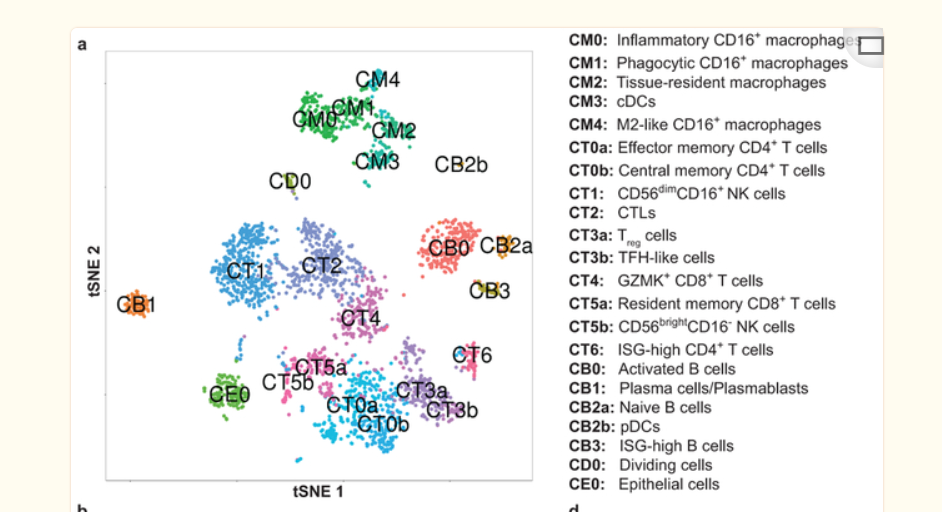

In [15]:
with Block('tsne'):
    data = adata.obs.copy().sort_values('pre_sub_cell_type_id')
    df_tsne = pd.DataFrame(json.loads(Path('t_SNE_coordinates_SLE-Broad.json').read_text())['data']).rename(
            columns={'annotations':'pre_sub_cell_type_id','cells':'cell_name','x':'tSNE1','y':'tSNE2'}
        ).pipe(ut.df.reindex_with_unique_col,'cell_name',True).sort_values('pre_sub_cell_type_id')
    assert (data['pre_sub_cell_type_id'].to_numpy() == df_tsne['pre_sub_cell_type_id'].to_numpy()).all()
    data['tSNE1'] = df_tsne['tSNE1'].to_numpy()
    data['tSNE2'] = df_tsne['tSNE2'].to_numpy()
    adata.obs = adata.obs.loc[:,[]].join(data)
    del data,df_tsne

In [16]:
ut.sc.show(adata,1,0,1)
display(adata.obs['cell_type'].value_counts(),
        # adata.obs['pre_sub_cell_type'].value_counts(),
        adata.obs['pre_sub_cell_type_id'].value_counts())

AnnData object with n_obs × n_vars = 2838 × 30155
    obs: 'cell_name', 'barcode', 'sample', 'pre_cell_type', 'disease', 'pre_sub_cell_type_id', 'status', '_batch', 'pre_sub_cell_type', 'cell_type', 'tSNE1', 'tSNE2'

[check unique]
	obs.index	var.index
	True		True


cell_name barcode    sample pre_cell_type  disease  \
K003_L1Q1_A05  K003_L1Q1_A05  AGTGCA  200-0608    Epithelial  Control   
K003_L1Q1_A09  K003_L1Q1_A09  ACGTAC  200-0608    Epithelial  Control   

              pre_sub_cell_type_id   status            _batch  \
K003_L1Q1_A05                  CE0  healthy  Control_200-0608   
K003_L1Q1_A09                  CE0  healthy  Control_200-0608   

              pre_sub_cell_type         cell_type      tSNE1      tSNE2  
K003_L1Q1_A05  Epithelial cells  Epithelial cells -29.192843 -20.129940  
K003_L1Q1_A09  Epithelial cells  Epithelial cells -30.518506 -19.995291

(2838, 12)

cell_type
T cells             1340
NK cells             424
B cells              418
macrophages          384
Epithelial cells     141
DCs                   99
Dividings cells       32
Name: count, dtype: int64

pre_sub_cell_type_id
CT1     369
CT2     348
CB0     245
CT0a    220
CT4     195
CT0b    181
CT3a    179
CE0     141
CM0     140
CM1     112
CT5a    106
CM2      86
CM3      82
CB1      81
CT3b     58
CT5b     55
CT6      53
CB2a     49
CM4      46
CB3      43
CD0      32
CB2b     17
Name: count, dtype: int64

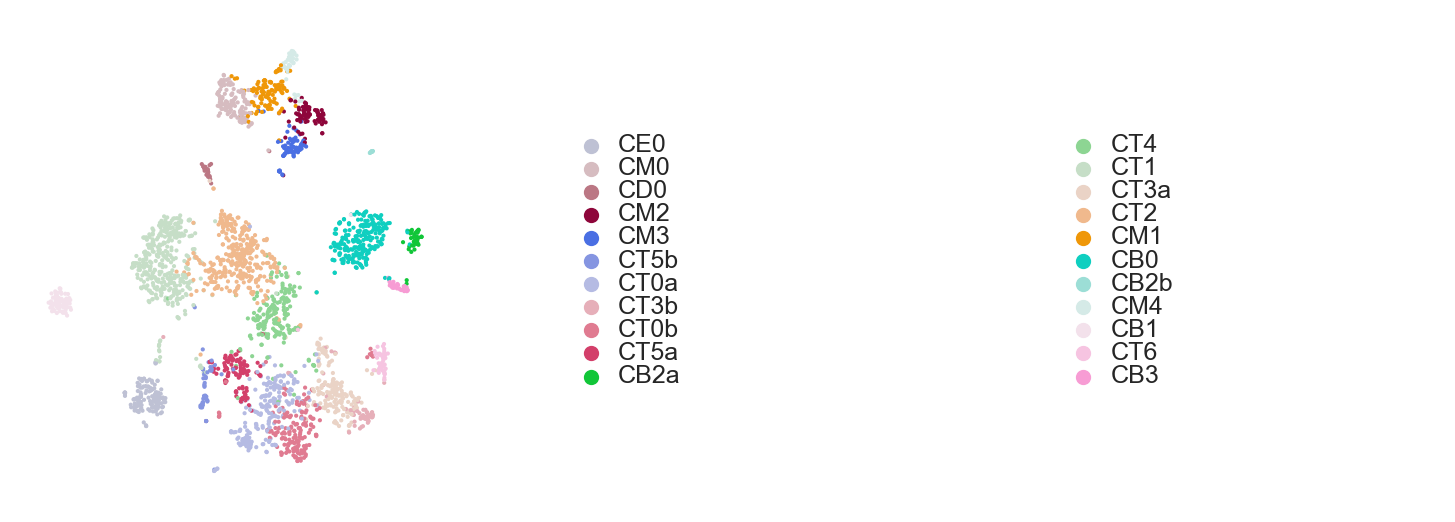

((-55.77543595955402, 44.319662398483416), (-36.589790907863154, 46.27347028051165))


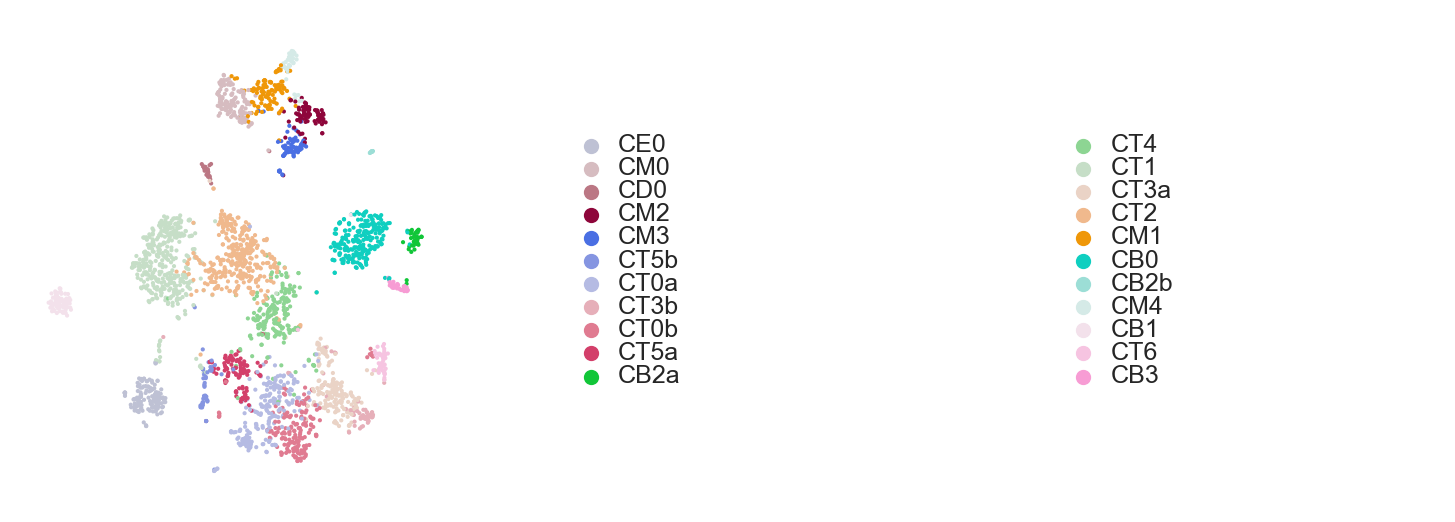

In [17]:
lims = None
adata = ut.sc.load_obsm_UMAP(adata,'tSNE1,tSNE2'.split(','))
with Block("umap",context=dict(adata = adata,key = 'pre_sub_cell_type_id',cmap={})) as context:
    context.cmap.update(pl.cmap.get(context.adata.obs[context.key]))
    fig,axs = pl.figure.subplots_get_fig_axs(1,3)
    ut.sc.pl.umap(context.adata,context.key,size=1,cmap=context.cmap,ax=axs[0])
    lims = (axs[0].get_xlim(),axs[0].get_ylim())
    for ax,keys in zip(axs[1:],np.array_split(list(context.cmap.keys()),2)):
        pl.cmap.show(subset_dict(context.cmap,keys),ax=ax,text_x=.02)
    display(fig)
    del fig,axs
print(lims)

In [18]:
adata.obs = adata.obs.loc[:,'_batch,status,disease,sample,cell_type,pre_sub_cell_type,pre_cell_type,pre_sub_cell_type_id,tSNE1,tSNE2'.split(',')]
display(adata,adata.obs.head(2),adata.obs['status'].value_counts())
with Block('save as mtx',context=dict(adata=adata,
    p_out = p_cache.joinpath('disease','SLE_h_SDY997'))) as context:
    if context.p_out.exists():
        print('[exists] {}\n\t{}'.format(context.p_out.name,context.p_out.parent))
    else:
        h5ad_to_mtx(context.adata,context.p_out)

AnnData object with n_obs × n_vars = 2838 × 30155
    obs: '_batch', 'status', 'disease', 'sample', 'cell_type', 'pre_sub_cell_type', 'pre_cell_type', 'pre_sub_cell_type_id', 'tSNE1', 'tSNE2'
    obsm: 'X_umap'

_batch   status  disease    sample         cell_type  \
K003_L1Q1_A05  Control_200-0608  healthy  Control  200-0608  Epithelial cells   
K003_L1Q1_A09  Control_200-0608  healthy  Control  200-0608  Epithelial cells   

              pre_sub_cell_type pre_cell_type pre_sub_cell_type_id      tSNE1  \
K003_L1Q1_A05  Epithelial cells    Epithelial                  CE0 -29.192843   
K003_L1Q1_A09  Epithelial cells    Epithelial                  CE0 -30.518506   

                   tSNE2  
K003_L1Q1_A05 -20.129940  
K003_L1Q1_A09 -19.995291

status
SLE        2676
healthy     162
Name: count, dtype: int64

[exists] SLE_h_SDY997
	/public/workspace/licanchengup/link/res_publish/run/cache/disease


# imm

In [19]:
adata_imm = ut.sc.subset_adata(adata,'cell_type','macrophages,DCs,NK cells,T cells,B cells'.split(','))\
    .copy()
display(adata_imm.obs['cell_type'].value_counts(),
        adata_imm.obs['pre_sub_cell_type'].value_counts())

adata_imm.obs['cell_type'] = adata_imm.obs['cell_type'].map(lambda k:{
    'B cells':'B cell',
    'T cells':'T cell',
    'NK cells':'natural killer cell',
    'macrophages':'macrophage'
}.setdefault(k,k))
display(adata_imm.obs['cell_type'].value_counts())

cell_type
T cells        1340
NK cells        424
B cells         418
macrophages     384
DCs              99
Name: count, dtype: int64

pre_sub_cell_type
CD56 dim CD16+ NK cells           369
CTLs                              348
Activated B cells                 245
Effector memory CD4+ T cells      220
GZMK+ CD8+ Tcells                 195
Central memory CD4+ T cells       181
Treg cells                        179
inflammatory CD16+ macrophages    140
Phagocytic CD16+ macrophages      112
Resident memory CD8+ Tcells       106
Tissue-resident macrophages        86
cDCs                               82
Plasma cells/Plasmablasts          81
TFH-like cells                     58
CD56 bright CD16- NK cells         55
ISG-high CD4+ T cells              53
Naive B cells                      49
M2-link CD16+ macrophages          46
ISG-high B cells                   43
pDCs                               17
Name: count, dtype: int64

cell_type
T cell                 1340
natural killer cell     424
B cell                  418
macrophage              384
DCs                      99
Name: count, dtype: int64

In [20]:
with Block('save as mtx',context=dict(adata=adata_imm,
    p_out = p_cache.joinpath('disease','SLE_h_SDY997_imm'))) as context:
    
    if context.p_out.exists():
        print('[exists] {}\n\t{}'.format(context.p_out.name,context.p_out.parent))
    else:
        h5ad_to_mtx(context.adata,context.p_out)

[exists] SLE_h_SDY997_imm
	/public/workspace/licanchengup/link/res_publish/run/cache/disease


## T cell

_batch   status  disease    sample cell_type  \
K004_L4Q4_D04  Control_200-0609  healthy  Control  200-0609    T cell   
K004_L4Q4_D06  Control_200-0609  healthy  Control  200-0609    T cell   

                          pre_sub_cell_type pre_cell_type  \
K004_L4Q4_D04  Effector memory CD4+ T cells     Leukocyte   
K004_L4Q4_D06  Effector memory CD4+ T cells     Leukocyte   

              pre_sub_cell_type_id     tSNE1      tSNE2  \
K004_L4Q4_D04                 CT0a  2.939968 -17.849166   
K004_L4Q4_D06                 CT0a  4.188020 -28.169153   

                              sub_cell_type  
K004_L4Q4_D04  Effector memory CD4+ T cells  
K004_L4Q4_D06  Effector memory CD4+ T cells

(1340, 11)

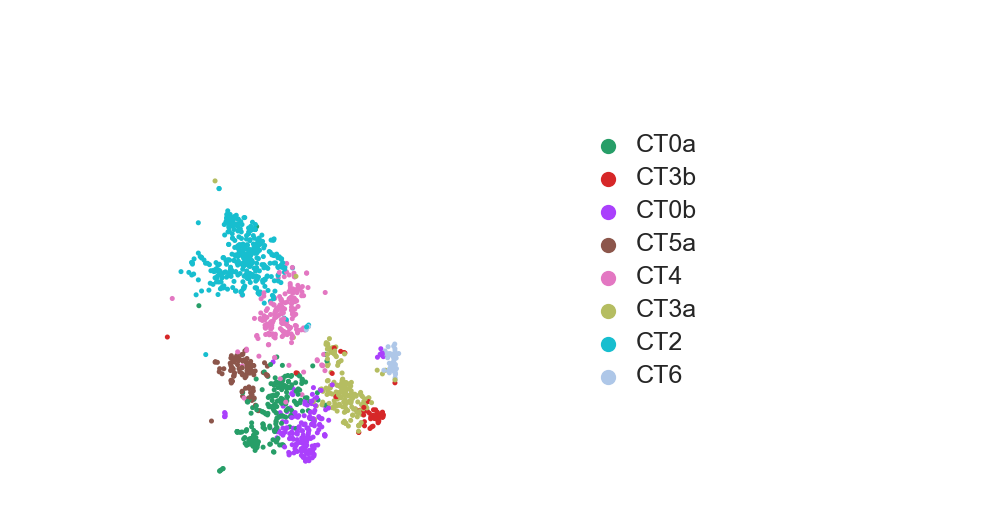

[exists] SLE_h_SDY997_imm_T
	/public/workspace/licanchengup/link/res_publish/run/cache/disease


In [21]:
adata_T = ut.sc.subset_adata(adata_imm,'cell_type','T cell').copy()
adata_T = ut.sc.load_obsm_UMAP(adata_T,'tSNE1,tSNE2'.split(','))
adata_T.obs['sub_cell_type'] = adata_T.obs['pre_sub_cell_type']
ut.sc.show(adata_T)
with Block("umap",context=dict(adata = adata_T,key = 'pre_sub_cell_type_id',cmap = {})) as context:
    context.cmap.update(pl.cmap.get(context.adata.obs[context.key]))
    fig,axs = pl.figure.subplots_get_fig_axs(1,2)
    ut.sc.pl.umap(context.adata,context.key,cmap=context.cmap,ax=axs[0],size=2)
    axs[0].set_xlim(*lims[0]),axs[0].set_ylim(*lims[1])
    pl.cmap.show(context.cmap,ax=axs[1],text_x=.02)
    display(fig)
    del fig,axs
with Block('save as mtx',context=dict(adata=adata_T,
    p_out = p_cache.joinpath('disease','SLE_h_SDY997_imm_T'))) as context:
    
    if context.p_out.exists():
        print('[exists] {}\n\t{}'.format(context.p_out.name,context.p_out.parent))
    else:
        h5ad_to_mtx(context.adata,context.p_out)
del adata_T

_batch   status  disease    sample  \
K004_L4Q4_D04  Control_200-0609  healthy  Control  200-0609   
K004_L4Q4_D06  Control_200-0609  healthy  Control  200-0609   

                          pre_sub_cell_type pre_sub_cell_type_id  \
K004_L4Q4_D04  Effector memory CD4+ T cells                 CT0a   
K004_L4Q4_D06  Effector memory CD4+ T cells                 CT0a   

               seurat_clusters cell_type sub_cell_type     UMAP1     UMAP2  
K004_L4Q4_D04                4    CD4+ T      CD4+ Tem -4.103793 -1.627745  
K004_L4Q4_D06                4    CD4+ T      CD4+ Tem -4.385683 -2.335674

(1340, 11)

cell_type
CD4+ T    718
CD8+ T    622
Name: count, dtype: int64

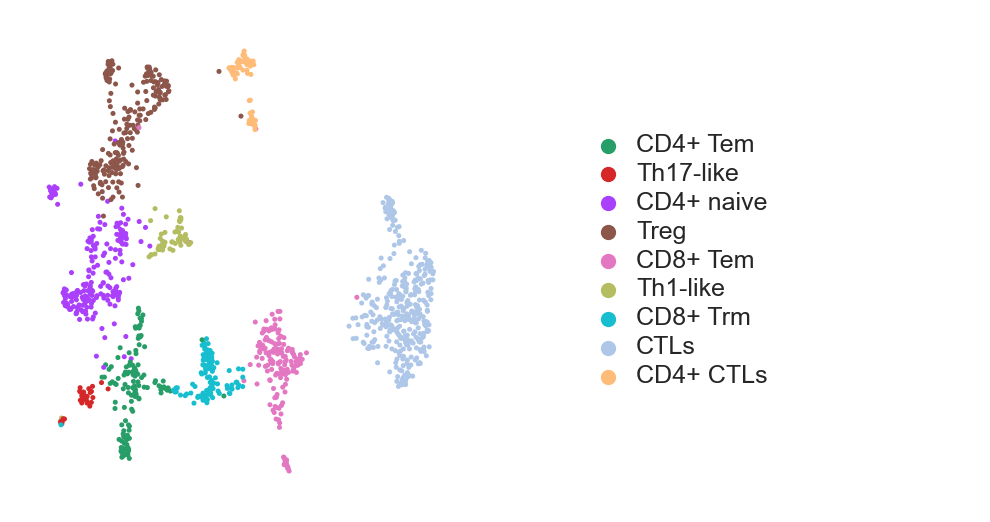

[exists] SLE_h_SDY997_imm_T2
	/public/workspace/licanchengup/link/res_publish/run/cache/disease


In [22]:
adata_T = ut.sc.subset_adata(adata_imm,'cell_type','T cell')
adata_T.obs = adata_T.obs.loc[:,
    '_batch,status,disease,sample,pre_sub_cell_type,pre_sub_cell_type_id'.split(',')].join(
        pd.read_csv('obs_Seurat_T.csv',index_col=0)
    )
ut.df.show(adata_T.obs)
display(adata_T.obs['cell_type'].value_counts())

adata_T = ut.sc.load_obsm_UMAP(adata_T,'UMAP1,UMAP2'.split(','))
with Block("umap",context=dict(adata = adata_T,key = 'sub_cell_type',cmap = {})) as context:
    context.cmap.update(pl.cmap.get(context.adata.obs[context.key]))
    fig,axs = pl.figure.subplots_get_fig_axs(1,2)
    ut.sc.pl.umap(context.adata,context.key,cmap=context.cmap,ax=axs[0],size=2)
    pl.cmap.show(context.cmap,ax=axs[1],text_x=.02)
    display(fig)
    del fig,axs
with Block('save as mtx',context=dict(adata=adata_T,
    p_out = p_cache.joinpath('disease','SLE_h_SDY997_imm_T2'))) as context:
    
    if context.p_out.exists():
        print('[exists] {}\n\t{}'.format(context.p_out.name,context.p_out.parent))
    else:
        h5ad_to_mtx(context.adata,context.p_out)

## B cell

_batch status disease    sample cell_type  \
K005_L1Q1_E03  SLE_200-0109    SLE     SLE  200-0109    B cell   
K005_L1Q1_E11  SLE_200-0109    SLE     SLE  200-0109    B cell   

              pre_sub_cell_type pre_cell_type pre_sub_cell_type_id      tSNE1  \
K005_L1Q1_E03     Naive B cells     Leukocyte                 CB2a  38.064121   
K005_L1Q1_E11     Naive B cells     Leukocyte                 CB2a  37.117858   

                  tSNE2  
K005_L1Q1_E03  8.002259  
K005_L1Q1_E11  9.889203

(418, 10)

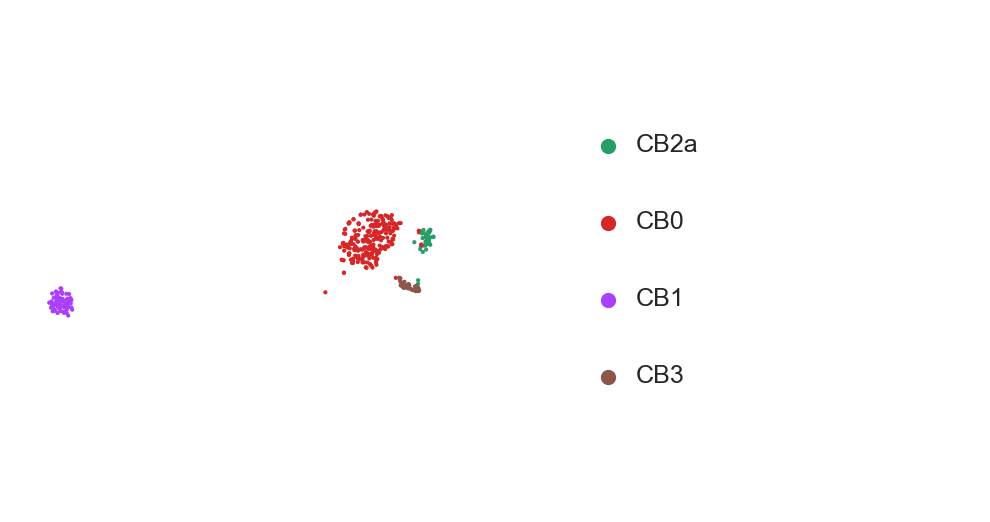

[exists] SLE_h_SDY997_imm_B
	/public/workspace/licanchengup/link/res_publish/run/cache/disease


In [23]:
adata_B = ut.sc.subset_adata(adata_imm,'cell_type','B cell').copy()
ut.sc.show(adata_B)
adata_B.obs['sub_cell_type'] = adata_B.obs['pre_sub_cell_type']
adata_B = ut.sc.load_obsm_UMAP(adata_B,'tSNE1,tSNE2'.split(','))
with Block("umap",context=dict(adata = adata_B,key = 'pre_sub_cell_type_id',cmap = {})) as context:
    context.cmap.update(pl.cmap.get(context.adata.obs[context.key]))
    fig,axs = pl.figure.subplots_get_fig_axs(1,2)
    ut.sc.pl.umap(context.adata,context.key,size=1,cmap=context.cmap,ax=axs[0])
    axs[0].set_xlim(*lims[0]),axs[0].set_ylim(*lims[1])
    pl.cmap.show(context.cmap,ax=axs[1],text_x=.02)
    display(fig)
    del fig,axs

with Block('save as mtx',context=dict(adata=adata_B,
    p_out = p_cache.joinpath('disease','SLE_h_SDY997_imm_B'))) as context:
    
    if context.p_out.exists():
        print('[exists] {}\n\t{}'.format(context.p_out.name,context.p_out.parent))
    else:
        h5ad_to_mtx(context.adata,context.p_out)
del adata_B

_batch status disease    sample pre_sub_cell_type  \
K005_L1Q1_E03  SLE_200-0109    SLE     SLE  200-0109     Naive B cells   
K005_L1Q1_E11  SLE_200-0109    SLE     SLE  200-0109     Naive B cells   

              pre_sub_cell_type_id  seurat_clusters cell_type sub_cell_type  \
K005_L1Q1_E03                 CB2a                1    B cell       B naive   
K005_L1Q1_E11                 CB2a                0    B cell   B activated   

                  UMAP1     UMAP2  
K005_L1Q1_E03 -5.857691  3.990549  
K005_L1Q1_E11 -3.374539  4.937973

cell_type
B cell              305
plasma cell          82
polluted(T cell)     31
Name: count, dtype: int64

_batch status disease    sample pre_sub_cell_type  \
K005_L1Q1_E03  SLE_200-0109    SLE     SLE  200-0109     Naive B cells   
K005_L1Q1_E11  SLE_200-0109    SLE     SLE  200-0109     Naive B cells   

              pre_sub_cell_type_id  seurat_clusters cell_type sub_cell_type  \
K005_L1Q1_E03                 CB2a                1    B cell       B naive   
K005_L1Q1_E11                 CB2a                0    B cell   B activated   

                  UMAP1     UMAP2  
K005_L1Q1_E03 -5.857691  3.990549  
K005_L1Q1_E11 -3.374539  4.937973

cell_type
B cell         305
plasma cell     82
Name: count, dtype: int64

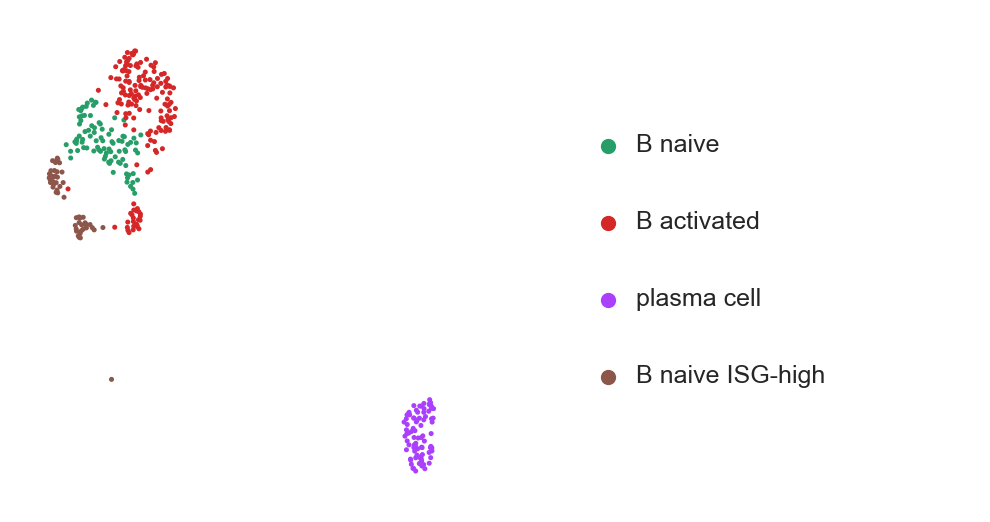

[exists] SLE_h_SDY997_imm_B2
	/public/workspace/licanchengup/link/res_publish/run/cache/disease


In [24]:
adata_B = ut.sc.subset_adata(adata_imm,'cell_type','B cell').copy()
adata_B.obs = adata_B.obs.loc[:,
    '_batch,status,disease,sample,pre_sub_cell_type,pre_sub_cell_type_id'.split(',')].join(
        pd.read_csv('obs_Seurat_B.csv',index_col=0)
    )
display(adata_B.obs.head(2),adata_B.obs['cell_type'].value_counts())
adata_B = ut.sc.subset_adata(adata_B,'cell_type','B cell,plasma cell'.split(',')).copy()
display(adata_B.obs.head(2),adata_B.obs['cell_type'].value_counts())
adata_B = ut.sc.load_obsm_UMAP(adata_B,'UMAP1,UMAP2'.split(','))

with Block("umap",context=dict(adata = adata_B,key = 'sub_cell_type',cmap = {})) as context:
    context.cmap.update(pl.cmap.get(context.adata.obs[context.key]))
    fig,axs = pl.figure.subplots_get_fig_axs(1,2)
    ut.sc.pl.umap(context.adata,context.key,cmap=context.cmap,ax=axs[0],size=2)
    pl.cmap.show(context.cmap,ax=axs[1],text_x=.02)
    display(fig)
    del fig,axs
    
with Block('save as mtx',context=dict(adata=adata_B,
    p_out = p_cache.joinpath('disease','SLE_h_SDY997_imm_B2'))) as context:
    
    if context.p_out.exists():
        print('[exists] {}\n\t{}'.format(context.p_out.name,context.p_out.parent))
    else:
        h5ad_to_mtx(context.adata,context.p_out)
del adata_B

## macrophage

_batch   status  disease    sample   cell_type  \
K003_L1Q1_E03  Control_200-0608  healthy  Control  200-0608  macrophage   
K004_L4Q3_D07  Control_200-0609  healthy  Control  200-0609  macrophage   

                            pre_sub_cell_type pre_cell_type  \
K003_L1Q1_E03  inflammatory CD16+ macrophages     Leukocyte   
K004_L4Q3_D07     Tissue-resident macrophages     Leukocyte   

              pre_sub_cell_type_id      tSNE1      tSNE2  \
K003_L1Q1_E03                  CM0  -3.345343  30.531953   
K004_L4Q3_D07                  CM2  15.380547  30.918081   

                                sub_cell_type  
K003_L1Q1_E03  inflammatory CD16+ macrophages  
K004_L4Q3_D07     Tissue-resident macrophages

(384, 11)

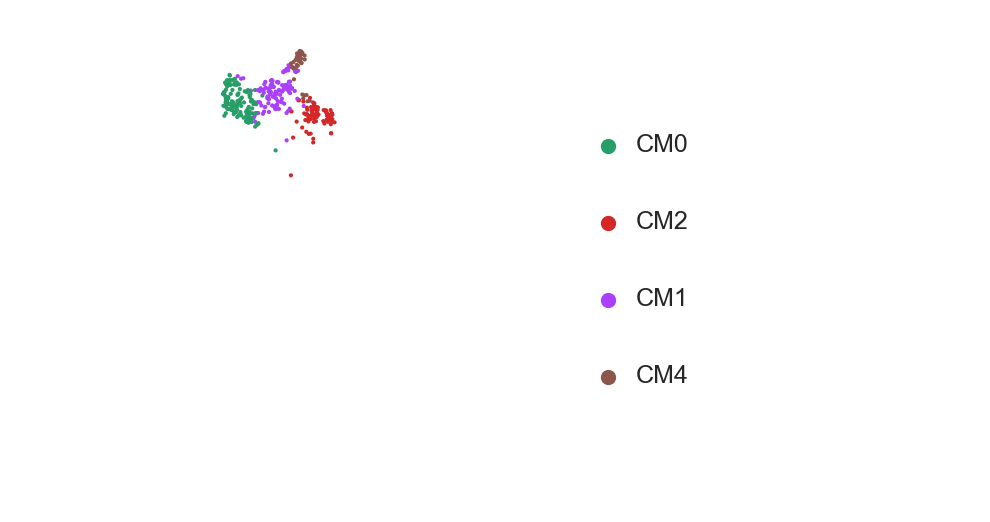

[exists] SLE_h_SDY997_imm_mar
	/public/workspace/licanchengup/link/res_publish/run/cache/disease


In [25]:
adata_mar = ut.sc.subset_adata(adata_imm,'cell_type','macrophage').copy()
adata_mar.obs['sub_cell_type'] = adata_mar.obs['pre_sub_cell_type']
ut.sc.show(adata_mar)
adata_mar = ut.sc.load_obsm_UMAP(adata_mar,'tSNE1,tSNE2'.split(','))
with Block("umap",context=dict(adata = adata_mar,key = 'pre_sub_cell_type_id',cmap = {})) as context:
    context.cmap.update(pl.cmap.get(context.adata.obs[context.key]))
    fig,axs = pl.figure.subplots_get_fig_axs(1,2)
    ut.sc.pl.umap(context.adata,context.key,size=1,cmap=context.cmap,ax=axs[0])
    axs[0].set_xlim(*lims[0]),axs[0].set_ylim(*lims[1])
    pl.cmap.show(context.cmap,ax=axs[1],text_x=.02)
    display(fig)
    del fig,axs

with Block('save as mtx',context=dict(adata=adata_mar,
    p_out = p_cache.joinpath('disease','SLE_h_SDY997_imm_mar'))) as context:
    
    if context.p_out.exists():
        print('[exists] {}\n\t{}'.format(context.p_out.name,context.p_out.parent))
    else:
        h5ad_to_mtx(context.adata,context.p_out)
del adata_mar

## NK

_batch   status  disease    sample  \
K004_L4Q4_D02  Control_200-0609  healthy  Control  200-0609   
K004_L4Q4_D24  Control_200-0609  healthy  Control  200-0609   

                         cell_type           pre_sub_cell_type pre_cell_type  \
K004_L4Q4_D02  natural killer cell  CD56 bright CD16- NK cells     Leukocyte   
K004_L4Q4_D24  natural killer cell  CD56 bright CD16- NK cells     Leukocyte   

              pre_sub_cell_type_id      tSNE1      tSNE2  \
K004_L4Q4_D02                 CT5b -13.667379 -20.529607   
K004_L4Q4_D24                 CT5b -12.798697 -23.866134   

                            sub_cell_type  
K004_L4Q4_D02  CD56 bright CD16- NK cells  
K004_L4Q4_D24  CD56 bright CD16- NK cells

(424, 11)

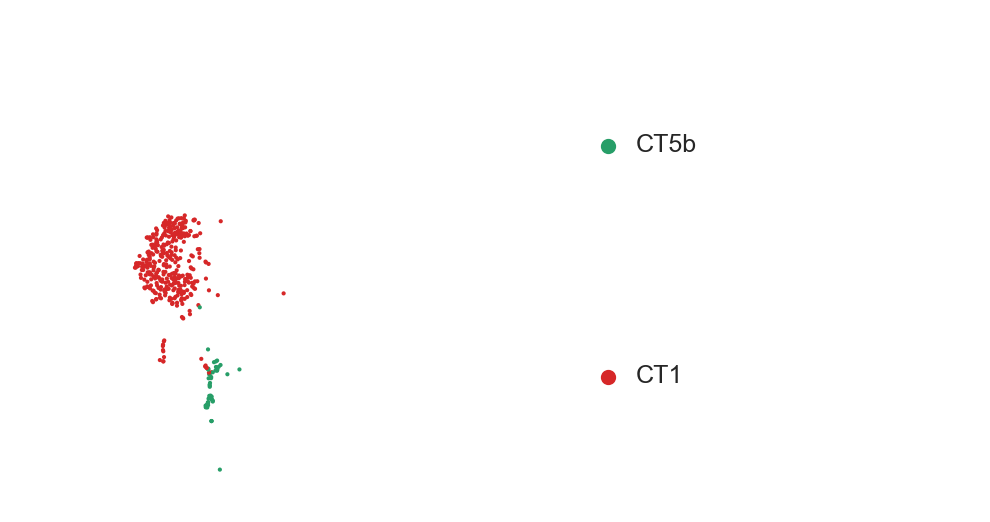

[exists] SLE_h_SDY997_imm_NK
	/public/workspace/licanchengup/link/res_publish/run/cache/disease


In [26]:
adata_nk = ut.sc.subset_adata(adata_imm,'cell_type','natural killer cell').copy()
adata_nk.obs['sub_cell_type'] = adata_nk.obs['pre_sub_cell_type']
ut.sc.show(adata_nk)
adata_nk = ut.sc.load_obsm_UMAP(adata_nk,'tSNE1,tSNE2'.split(','))
with Block("umap",context=dict(adata = adata_nk,key = 'pre_sub_cell_type_id',cmap = {})) as context:
    context.cmap.update(pl.cmap.get(context.adata.obs[context.key]))
    fig,axs = pl.figure.subplots_get_fig_axs(1,2)
    ut.sc.pl.umap(context.adata,context.key,size=1,cmap=context.cmap,ax=axs[0])
    axs[0].set_xlim(*lims[0]),axs[0].set_ylim(*lims[1])
    pl.cmap.show(context.cmap,ax=axs[1],text_x=.02)
    display(fig)
    del fig,axs

with Block('save as mtx',context=dict(adata=adata_nk,
    p_out = p_cache.joinpath('disease','SLE_h_SDY997_imm_NK'))) as context:
    
    if context.p_out.exists():
        print('[exists] {}\n\t{}'.format(context.p_out.name,context.p_out.parent))
    else:
        h5ad_to_mtx(context.adata,context.p_out)
del adata_nk

In [27]:
del adata,adata_imm

# 标准流程

聚类挺不错的

In [28]:
plt.close('all')

AnnData object with n_obs × n_vars = 2838 × 30155
    obs: '_batch', 'status', 'disease', 'sample', 'cell_type', 'pre_sub_cell_type', 'pre_cell_type', 'pre_sub_cell_type_id', 'tSNE1', 'tSNE2'
    var: 'gene_ids'

_batch   status  disease    sample         cell_type  \
K003_L1Q1_A05  Control_200-0608  healthy  Control  200-0608  Epithelial cells   
K003_L1Q1_A09  Control_200-0608  healthy  Control  200-0608  Epithelial cells   

              pre_sub_cell_type pre_cell_type pre_sub_cell_type_id      tSNE1  \
K003_L1Q1_A05  Epithelial cells    Epithelial                  CE0 -29.192843   
K003_L1Q1_A09  Epithelial cells    Epithelial                  CE0 -30.518506   

                   tSNE2  
K003_L1Q1_A05 -20.129940  
K003_L1Q1_A09 -19.995291

(2838, 10)

2838

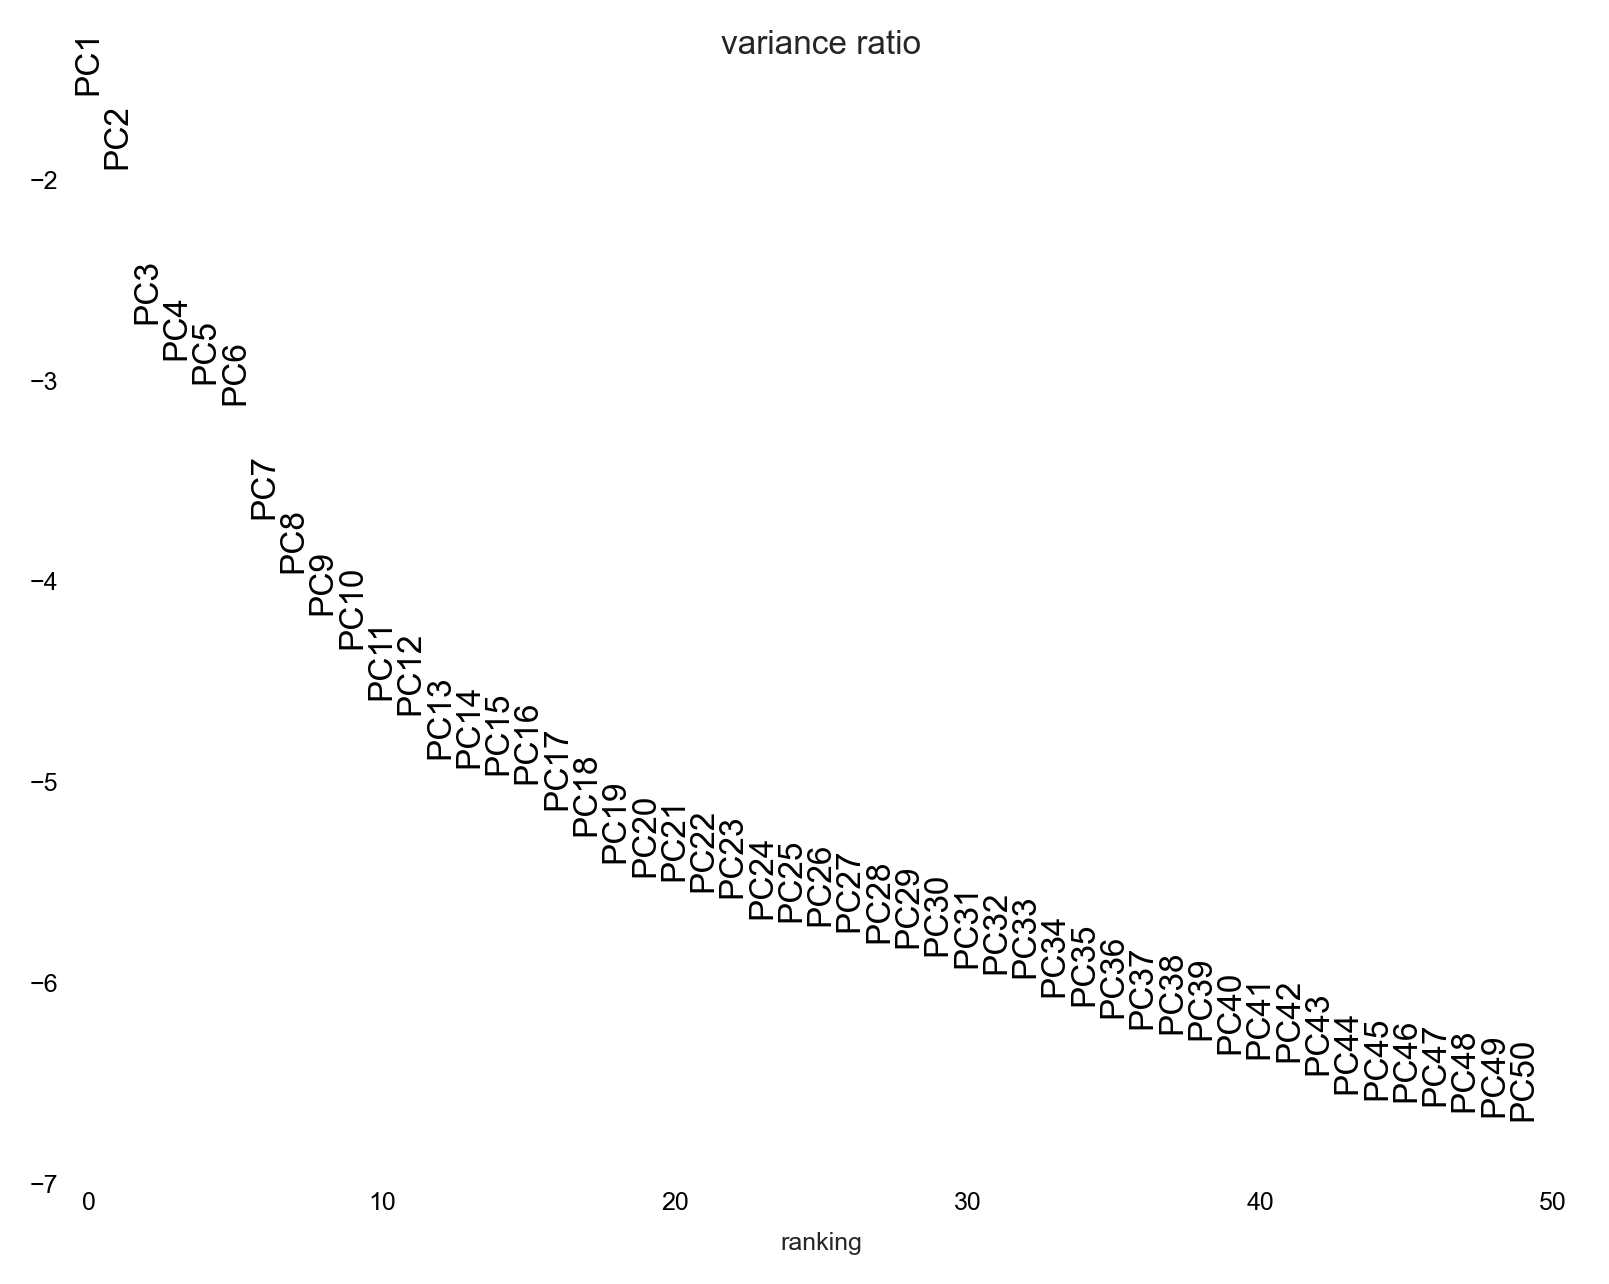

/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


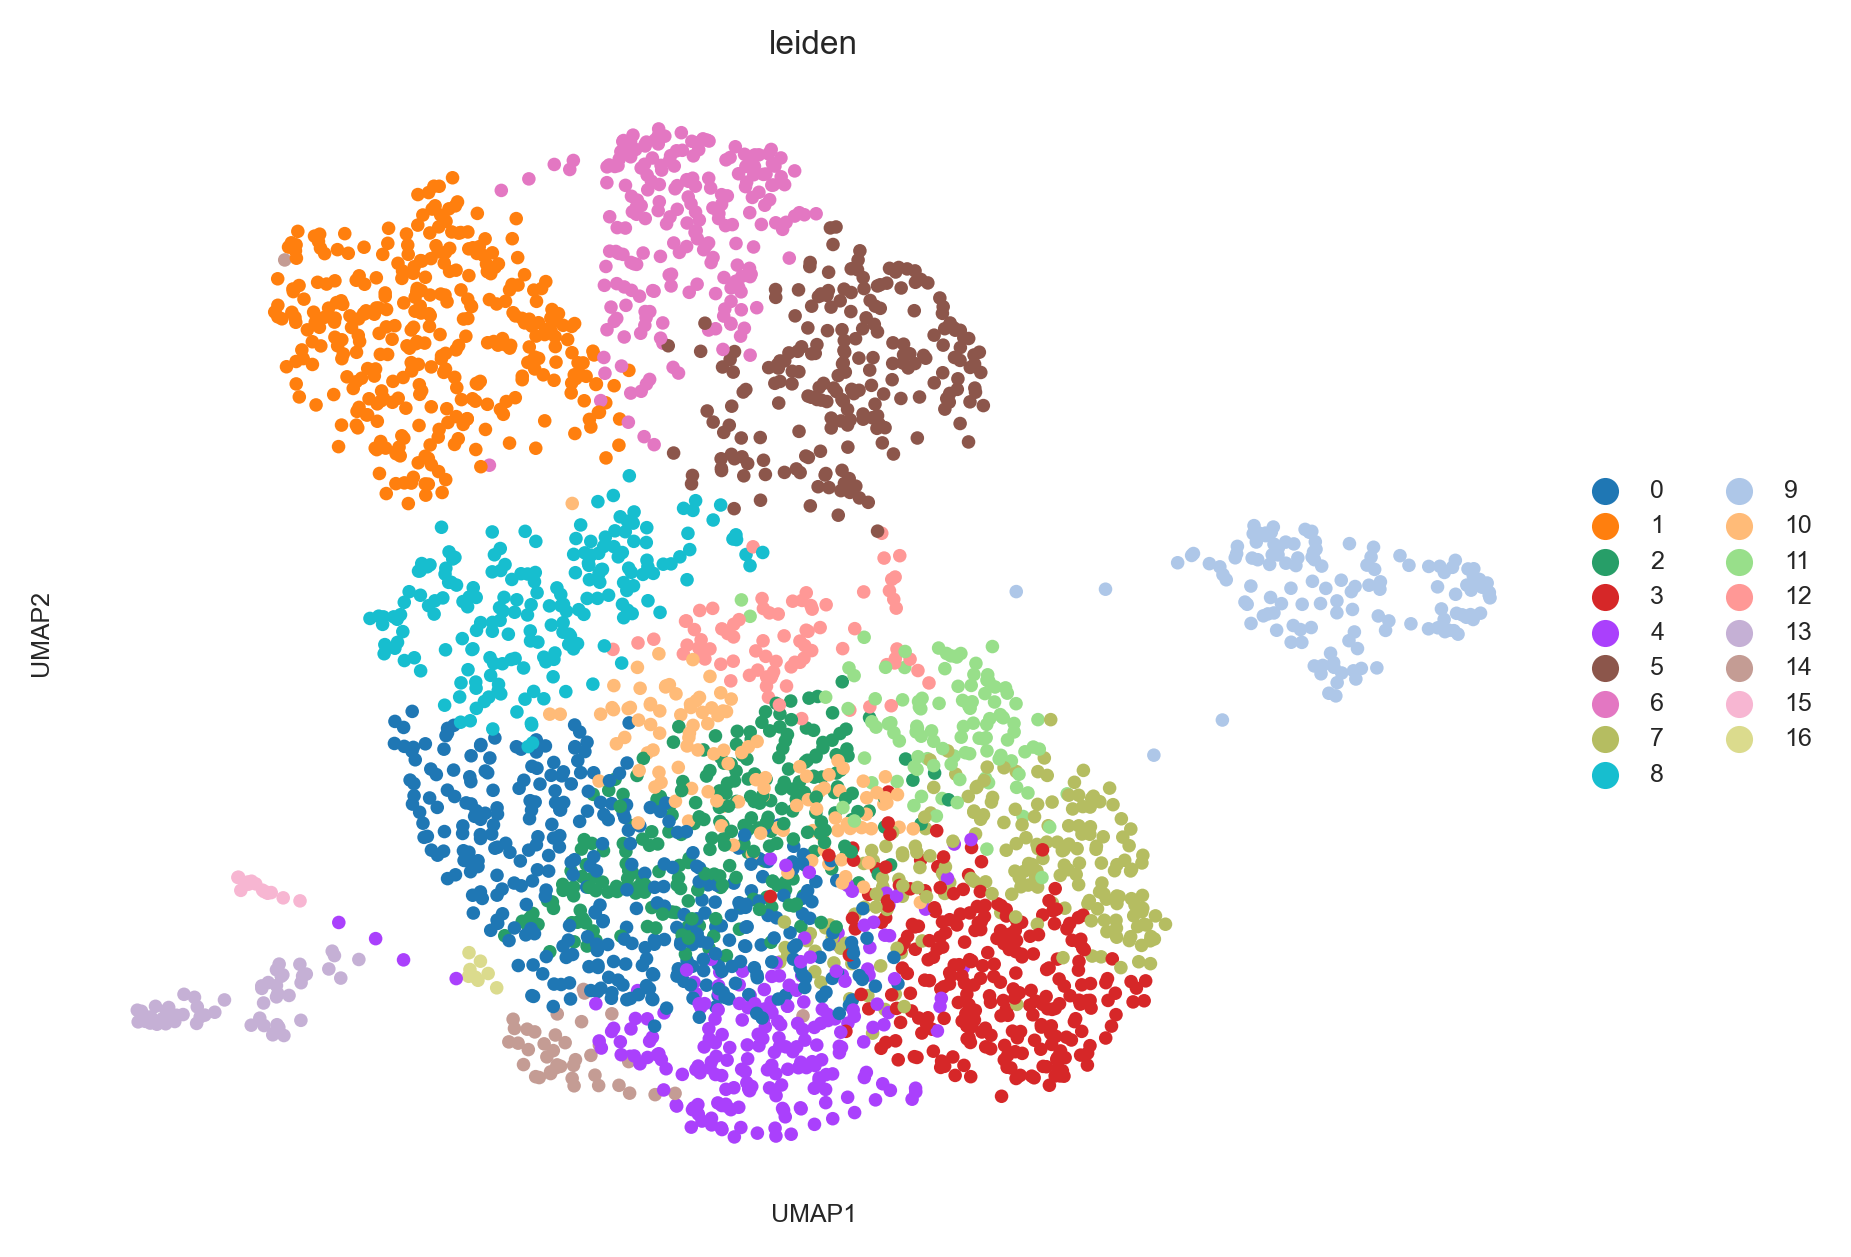

In [29]:
adata = load_adata(p_cache.joinpath('disease','SLE_h_SDY997'))
display(adata,adata.obs.head(2),
        adata.obs.shape,adata.obs['pre_sub_cell_type_id'].notna().sum())
sc.pp.normalize_total(adata)
sc.tl.pca(adata)
sc.pl.pca_variance_ratio(adata, n_pcs=50, log=True)

sc.pp.neighbors(adata)
sc.tl.umap(adata)
# Using the igraph implementation and a fixed number of iterations can be significantly faster, especially for larger datasets
sc.tl.leiden(adata)
sc.pl.umap(adata, color=["leiden"])

/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired v

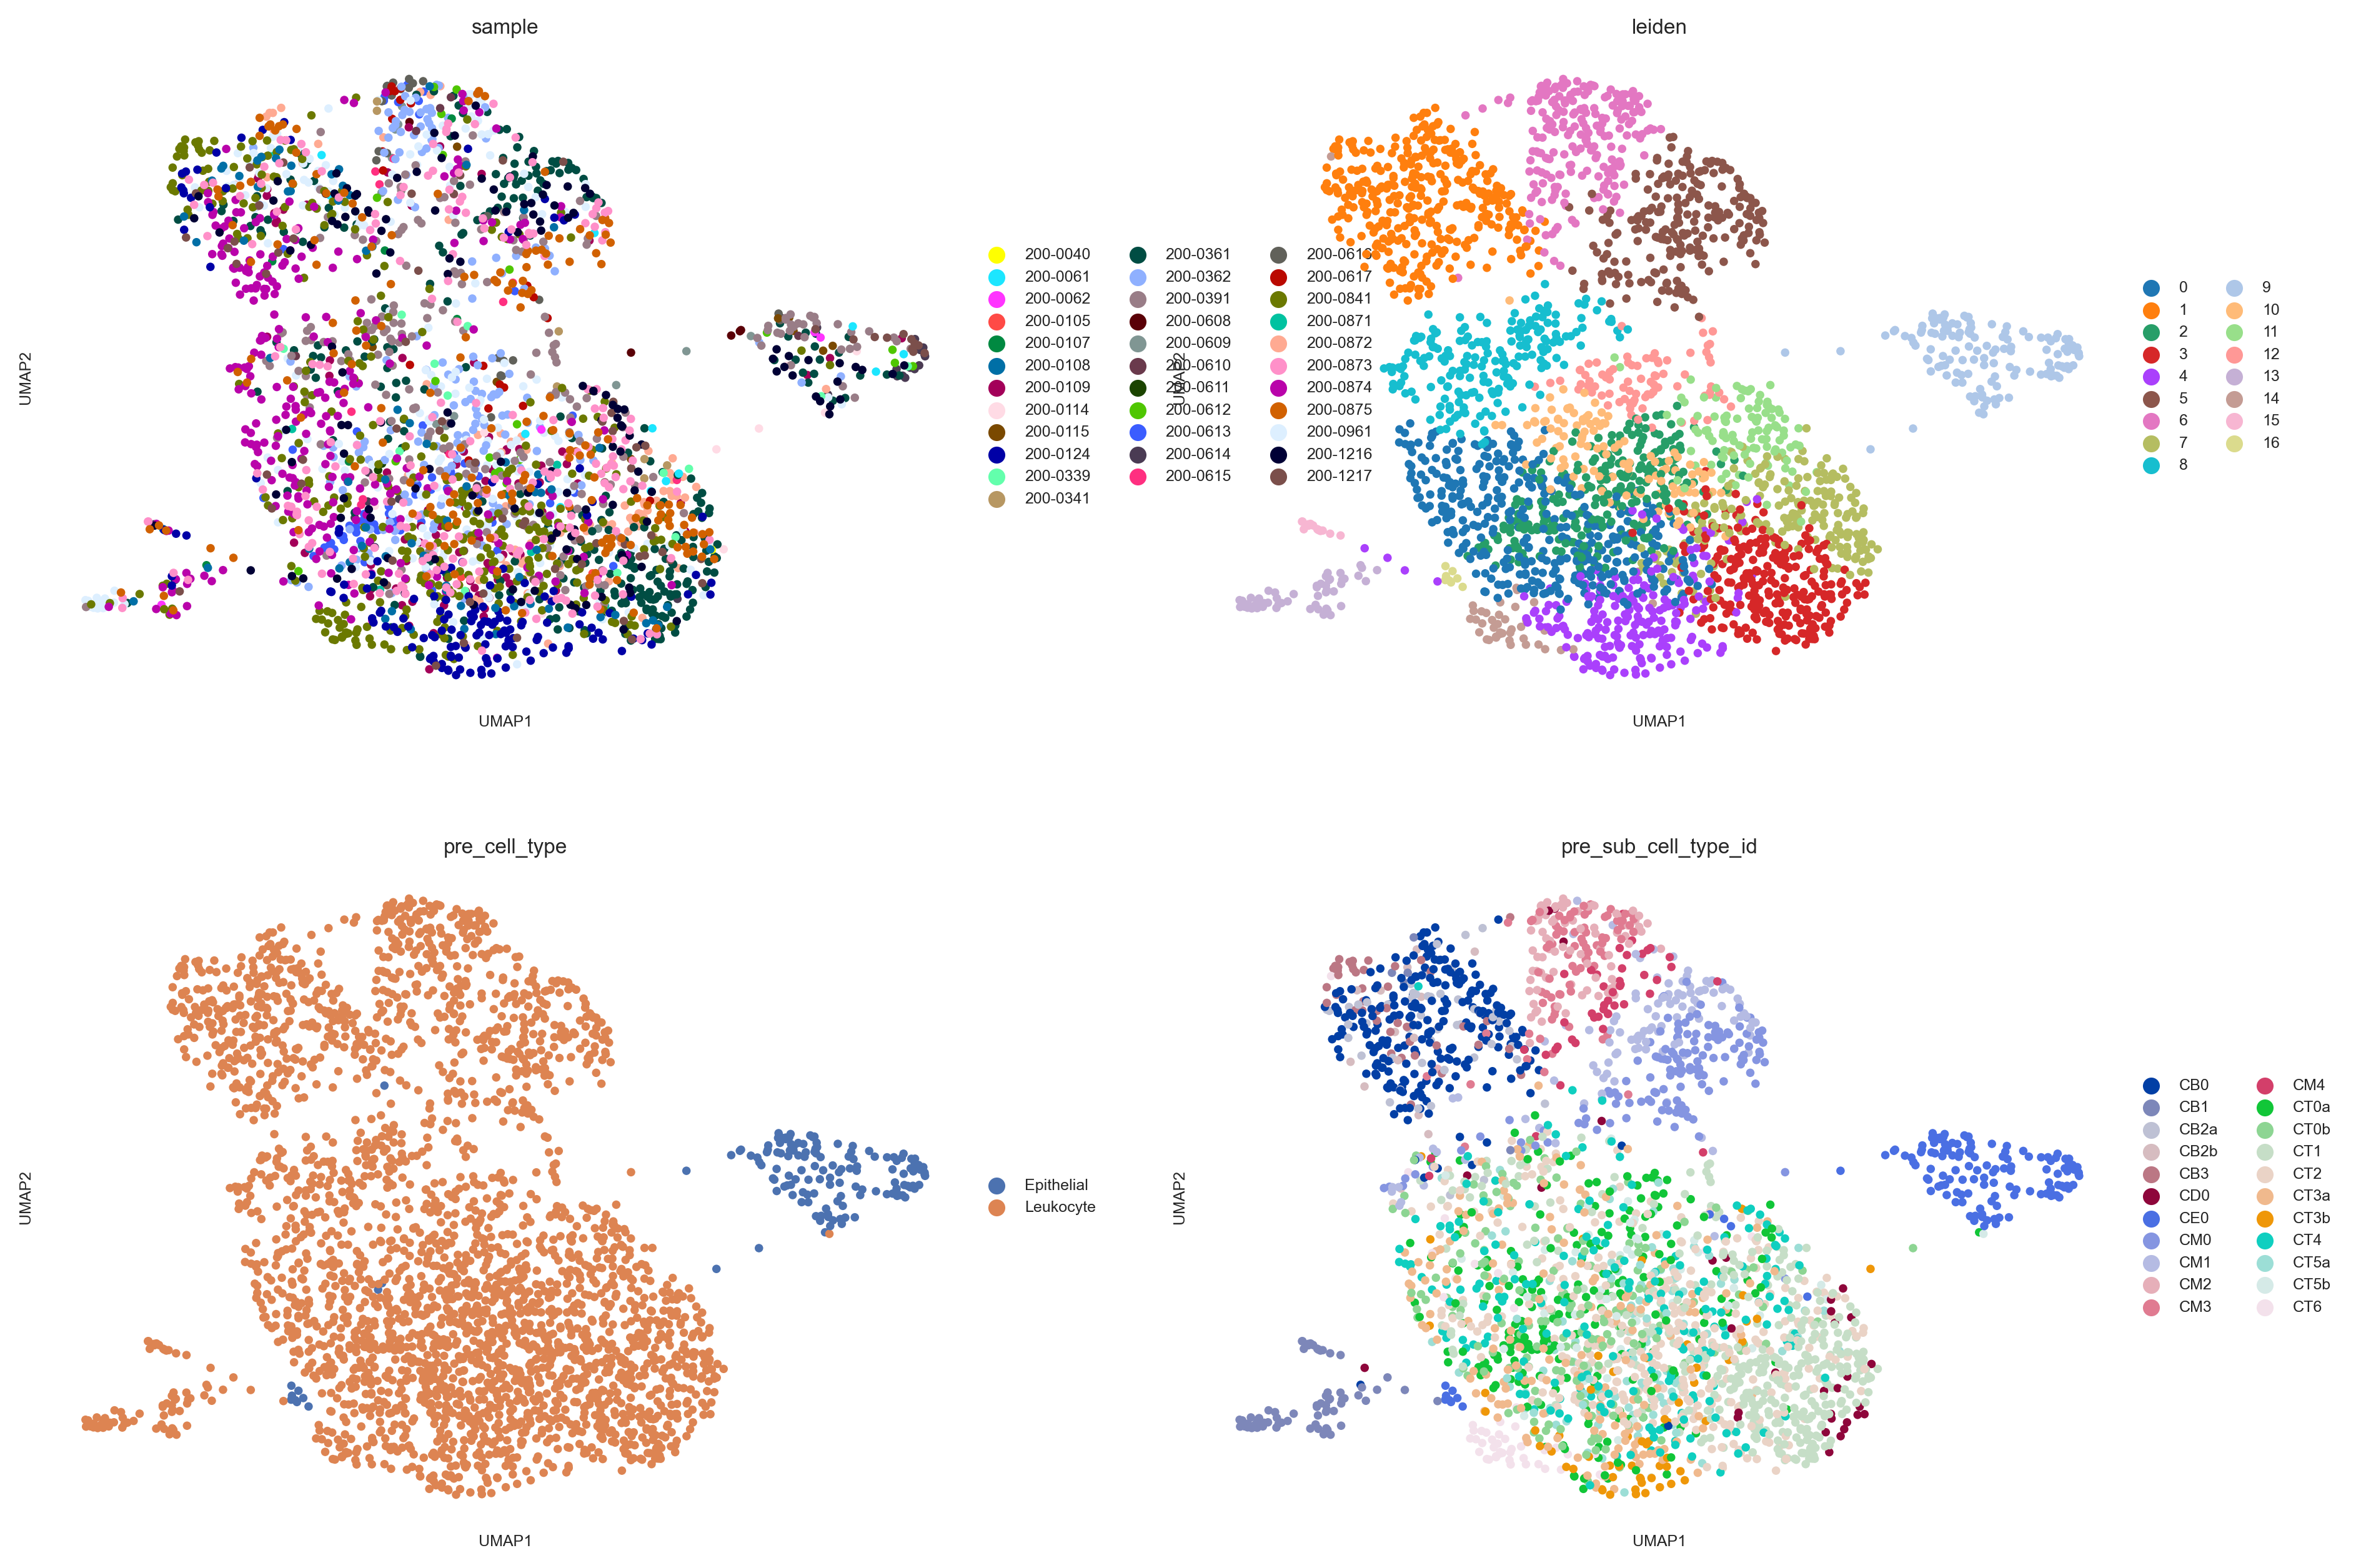

In [30]:
sc.pl.umap(adata, color='sample,leiden,pre_cell_type,pre_sub_cell_type_id'.split(','),ncols=2)